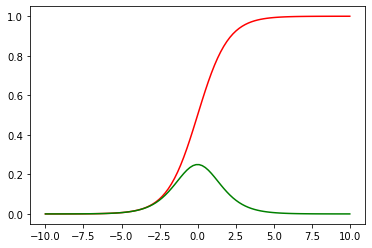

In [4]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline



X1 = np.array([0.27, 0.09, 0.00, 0.23, 0., 1.00, 0.32]);
#
#
x = np.linspace(-10,10,100);
# function to compute the sigmoid
sigmoid = lambda x: 1/(1 + np.exp(-x));

sigmoid_prime = lambda x: sigmoid(x) * (1-sigmoid(x))

pl.plot(x,sigmoid(x),'r') # plot the line

pl.plot(x,sigmoid_prime(x),'g') # plot the prime




In [5]:
sigmoid = lambda x: 1/(1 + np.exp(-x));


In [6]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
#
# function to compute the sigmoid
sigmoid = lambda x: 1/(1 + np.exp(-x));
#
################################################################################
# This function implements the backpropagation algorithm for a simple 3-4-1 ANN
#  W1 and W2 are the weight matrices of the respective layers:
#   W1 is the weight matrix between the input layer and hidden layer
#   W2 is the weight matrix between the hidden layer and output layer. 
#  X and D are the input and correct output of the training data (XOR), respectively.
################################################################################
def backprop(W1, W2, X, D):
    alpha = 0.9; # learning rate
    N=4;
    for k in range(0,N):
        x = X[k, :].T; #inputs from training data
        #print("x=",x)
        d = D[k]; # correct output from training data
        ##########################
        # forward propagation step
        ##########################
        # calculate the weighted sum of hidden node
        v1 = np.dot(W1,x);
        #print("v1= ", v1)
        #pass the weighted sum to the activation function, this gives the outputs from hidden layer
        y1 = sigmoid(v1);
        #print("y1= ", y1)
        #calculate the weighted sum of the output layer
        v = np.dot(W2,y1);
        #print("v", v)
        # pass it to the activation function, this returns the output of the third layer
        y = sigmoid(v);
        #print("y=",y)
        #calculate the error, difference between correct output and computed output
        e = d - y;
        #print("e= ",e)
        #calculate delta, derivative of the activation function times the error
        # note that 𝜎′(𝑥)=𝜎(𝑥)∙(1− 𝜎(𝑥)) = y * (1-y)
        delta = y*(1-y)*e; # element wise multiplication
        #print("delta= ",delta)
        ###########################
        # Backward propagation step
        ###########################
        # propagate the output node delta, δ, backward, and calculate the deltas of the hidden layer.
        e1 = np.dot(W2.T, delta);
        #print("e1= ",e1)
        delta1 = y1*(1-y1)*e1;  # element wise multiplication
        #print("delta1= ",delta1)
        #
        # Adjust the weights according to the learning rule
        delta1.shape=(4,1) # column vector of deltas for the hidden layer
        x.shape=(1,3) # row vector of the current input
        dW1 = alpha*np.dot(delta1,x);
        W1 = W1 + dW1;
        #
        y1.shape = (1,4)
        #print(y1.T.shape)
        dW2 = alpha*np.dot(delta,y1);
        W2 = W2 + dW2;
    #
    return W1, W2;
#
#################################
# Testing backprop with XOR data
#################################
# inputs array
X = np.array(
    [ [0, 0, 1],
      [0, 1, 1],
      [1, 0, 1],
      [1, 1, 1] 
    ]);
#print(X)
# correct output column vector
D = np.array(
            [ 
                [0], 
                [1], 
                [1], 
                [0]
            ]);
#print(D)
# initialize the weights between input layer and hidden layer
W1 = 2*np.random.rand(4, 3) - 1;
# initialize the weights between hidden layer and output layer
W2 = 2*np.random.rand(1, 4) - 1;
#
# run the backprop algorithm to compute the weights
for epoch in range(1,10000): # train
    W1, W2 = backprop(W1, W2, X, D);
#
# calculate the output of the network with computed weights 
N=4
for k in range(0,N):
    x = X[k, :].T; #inputs from training data
    #print("x=",x)
    d = D[k]; # correct output from training data
    ##########################
    # forward propagation step
    ##########################
    # calculate the weighted sum of hidden node
    v1 = np.dot(W1,x);
    #print("v1= ", v1)
    #pass the weighted sum to the activation function, this gives the outputs from hidden layer
    y1 = sigmoid(v1);
    #print("y1= ", y1)
    #calculate the weighted sum of the output layer
    v = np.dot(W2,y1);
    #print("v", v)
    # pass it to the activation function, this returns the output of the third layer
    y = sigmoid(v);
    print("y=",y)


y= [0.00705956]
y= [0.98835022]
y= [0.98952629]
y= [0.01446277]


In [7]:
print(W1)
print(W2)
N=4;
for k in range(0,N):
    x = X[k, :].T; #inputs from training data
    ##########################
    # forward propagation step
    ##########################
    # calculate the weighted sum of hidden node
    v1 = np.dot(W1,x);
    #pass the weighted sum to the activation function, this gives the outputs from hidden layer
    y1 = sigmoid(v1);
    #calculate the weighted sum of the output layer
    v = np.dot(W2,y1);
    # pass it to the activation function, this returns the output of the third layer
    y = sigmoid(v);
    print("y=",y)


[[-6.76022693  5.07291893 -2.24840071]
 [-6.04461812 -5.83795469  1.99321264]
 [ 2.25132437 -5.36529656 -0.38241402]
 [-0.27767563  3.88961189 -1.1579487 ]]
[[ 9.83712396 -8.33569749  6.52202312 -4.99698836]]
y= [0.00705956]
y= [0.98835022]
y= [0.98952629]
y= [0.01446277]
